# **Calories Burnt Prediction**

**Dataset Link:-** https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/data

**Importing the Dependencies**

In [136]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import pickle

sns.set()

**Data Collection & Processing**

In [137]:
#Load the Calories dataset
df1 = pd.read_csv("C:\\Users\\ASUS\\Downloads\\calories.csv")
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [138]:
df1.shape

(15000, 2)

In [139]:
#Load the Exercise Dataset
df2 = pd.read_csv("C:\\Users\\ASUS\\Downloads\\exercise.csv")
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [140]:
df2.shape

(15000, 8)

**Combining the two Dataframes**

In [141]:
df = pd.concat([df2,df1["Calories"]],axis=1)

In [142]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [143]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


**Data Analysis**

In [144]:
# get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [145]:
# checking for missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [146]:
# drop User_ID column because this is not required from Main Dataframe itself

df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [147]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


**Data Visualization**

<Axes: xlabel='Height', ylabel='Weight'>

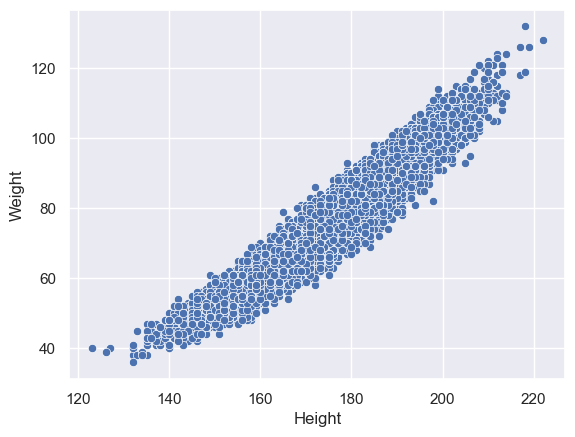

In [149]:
sns.scatterplot(data=df,x="Height",y="Weight")

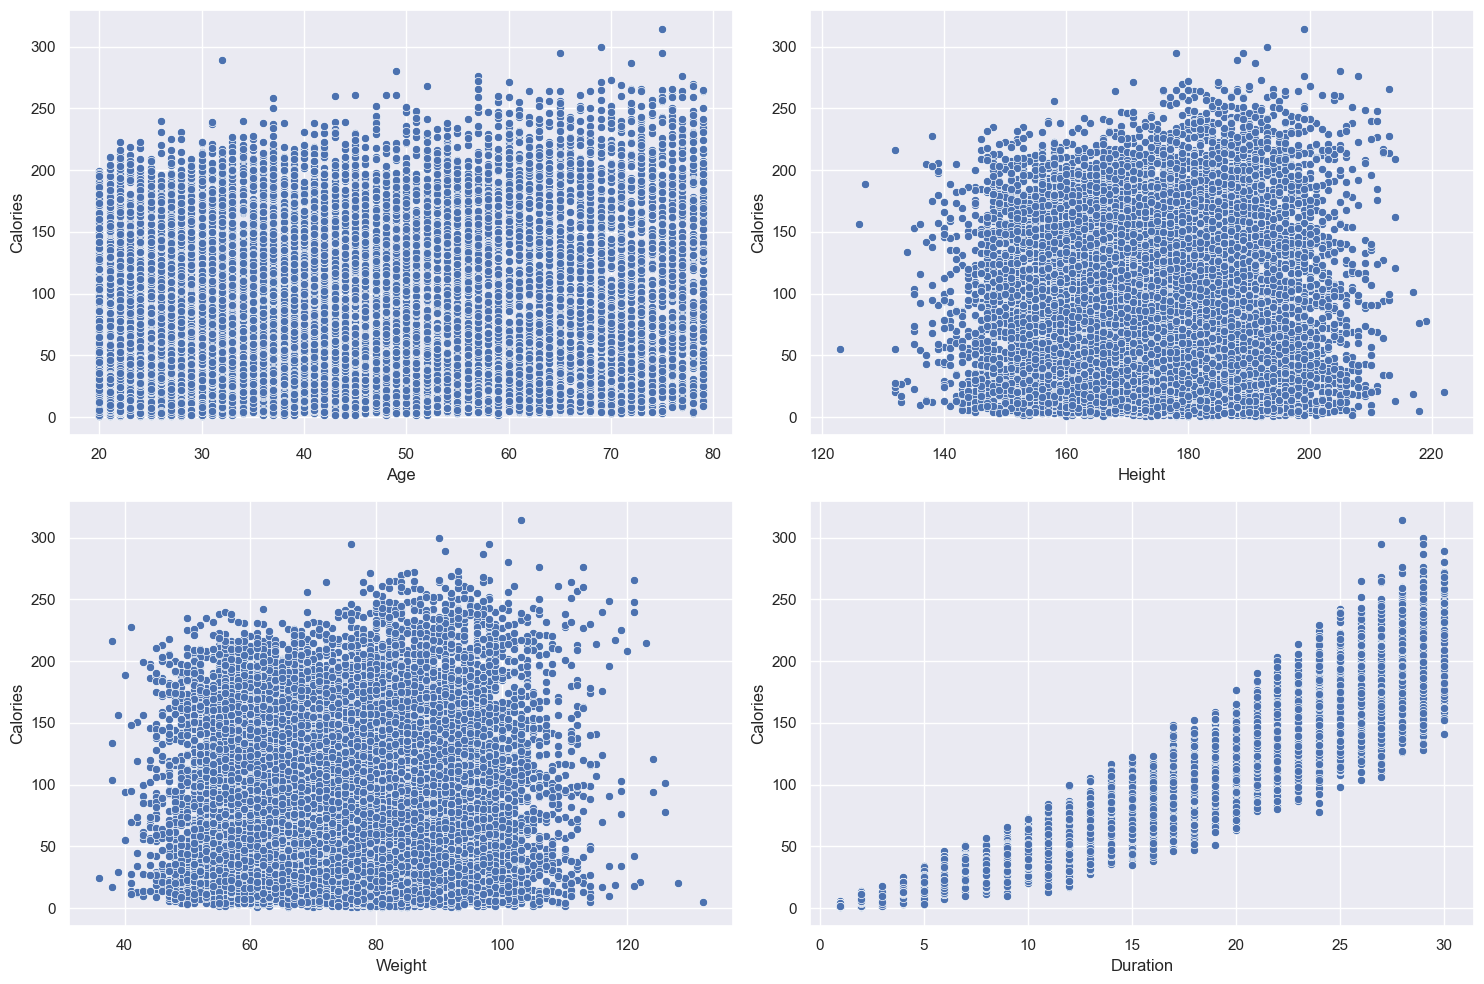

In [150]:
features = ['Age', 'Height', 'Weight', 'Duration']
  
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sns.scatterplot(data=df,x=col,y="Calories")
plt.tight_layout()
plt.show()

#### **Separate Categorical and Numerical Features**

**1. Categorical Feature**

In [151]:
#Fatching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O'] #-->Object-"o"
cat_col

['Gender']

In [152]:
df["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

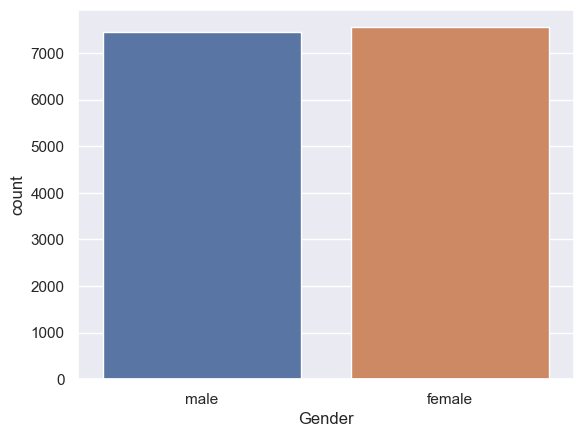

In [153]:
# plotting the gender column in count plot
sns.countplot(x=df["Gender"])
plt.show()

Converting the text data to numerical values

In [154]:
#pd.get_dummies(df["Gender"],drop_first=True)

In [155]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [156]:
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)

In [157]:
categorical

,male
0,1
1,0
2,1
3,0
4,0
...,...
14995,0
14996,0
14997,0
14998,1


**2.Numerical Features**

In [158]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [159]:
df[Num_col].shape

(15000, 7)

In [160]:
Numerical = df[Num_col]
Numerical.head() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [161]:
Numerical.shape

(15000, 7)

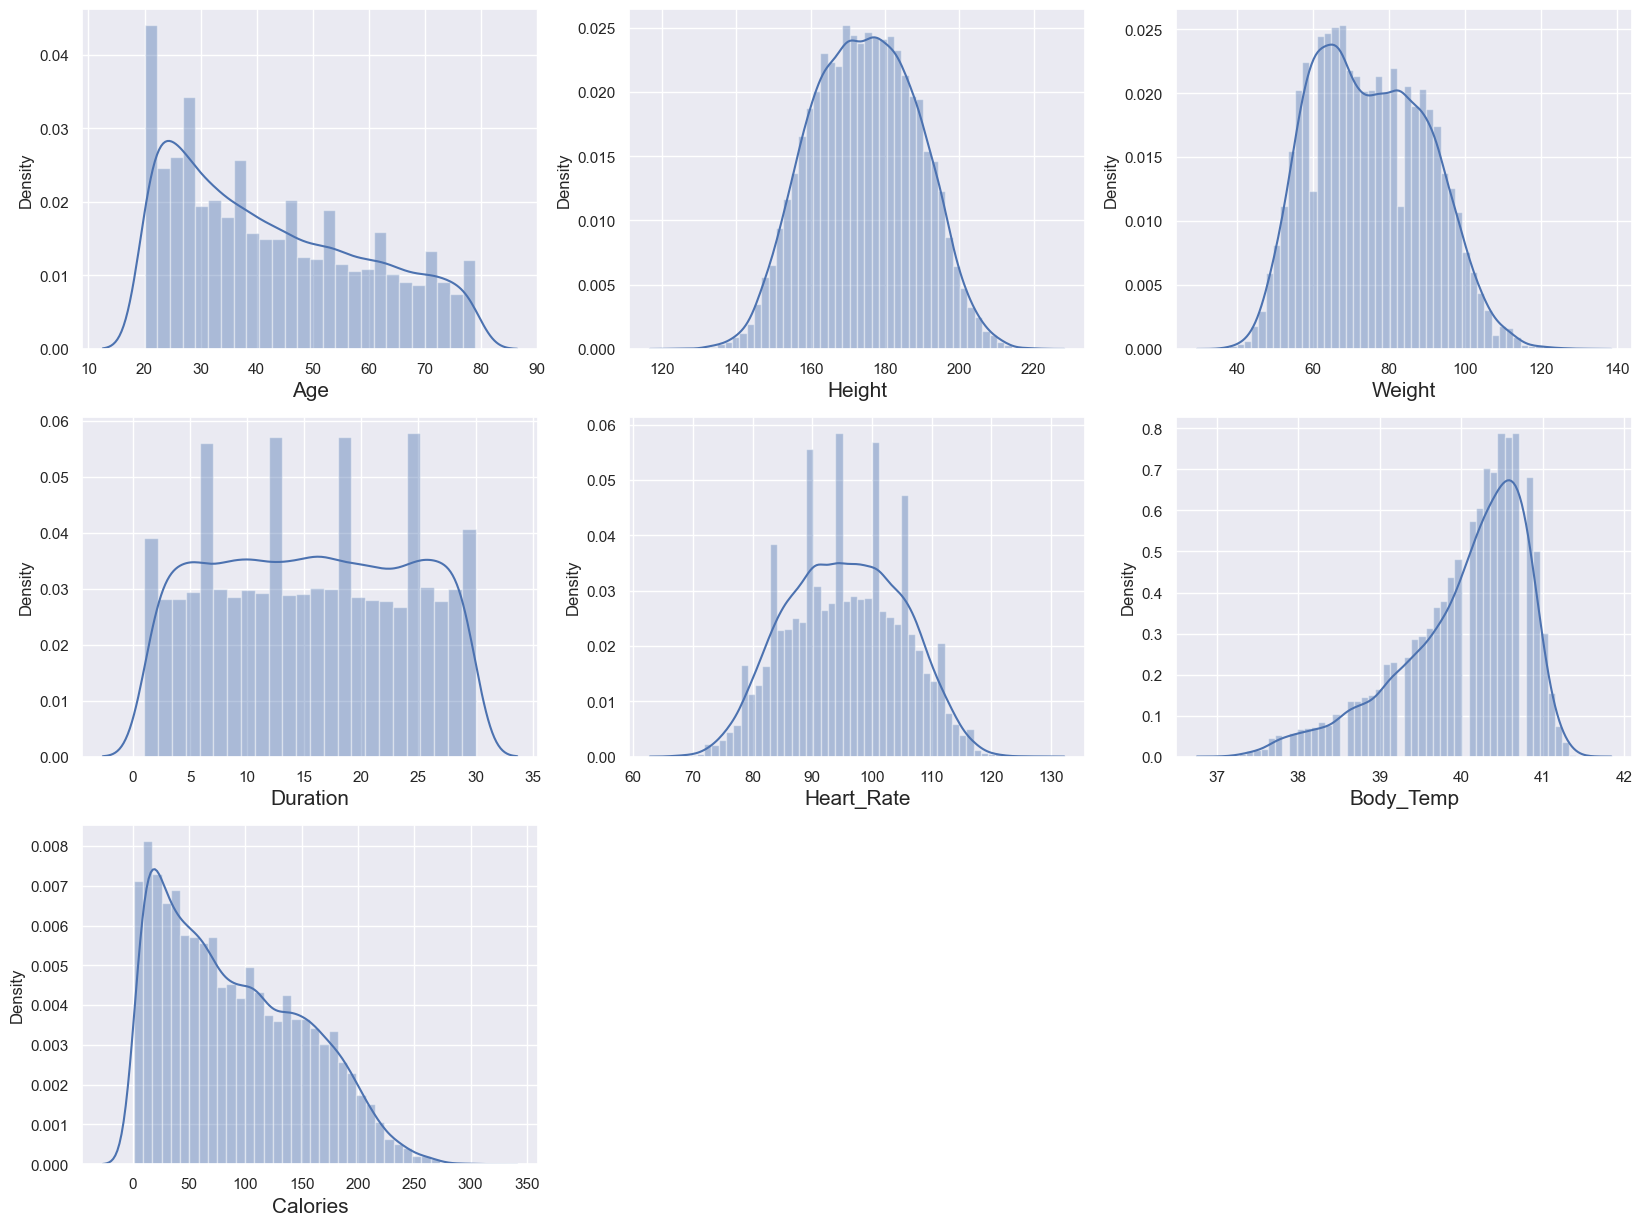

In [162]:
# finding the distribution of various columns
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

**Finding the Correlation in the dataset**

1. Positive Correlation
2. Negative Correlation

<Axes: >

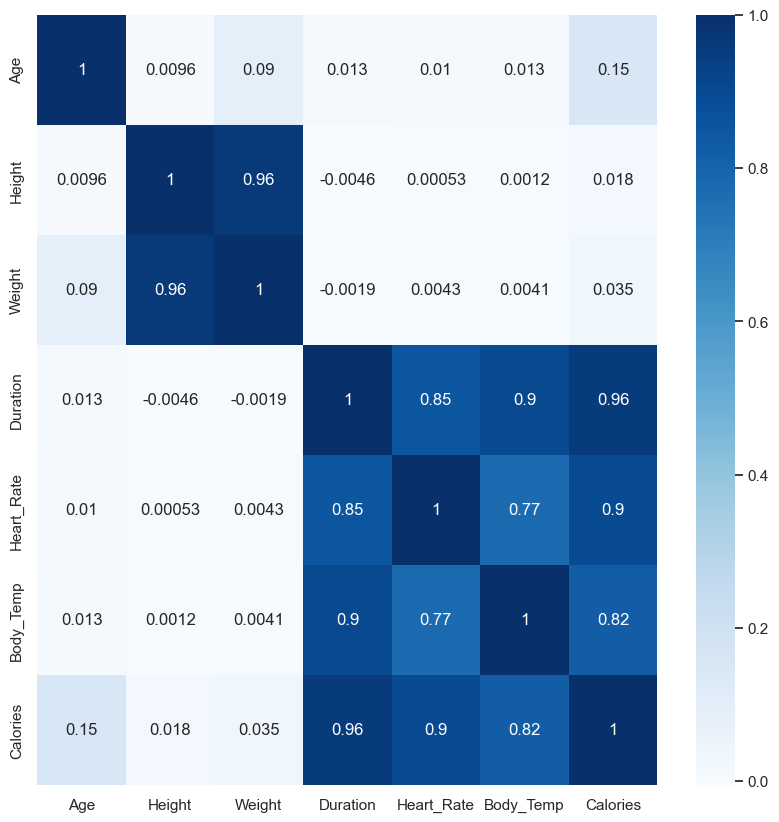

In [163]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [164]:
data = pd.concat([categorical,Numerical],axis=1)

In [165]:
data.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

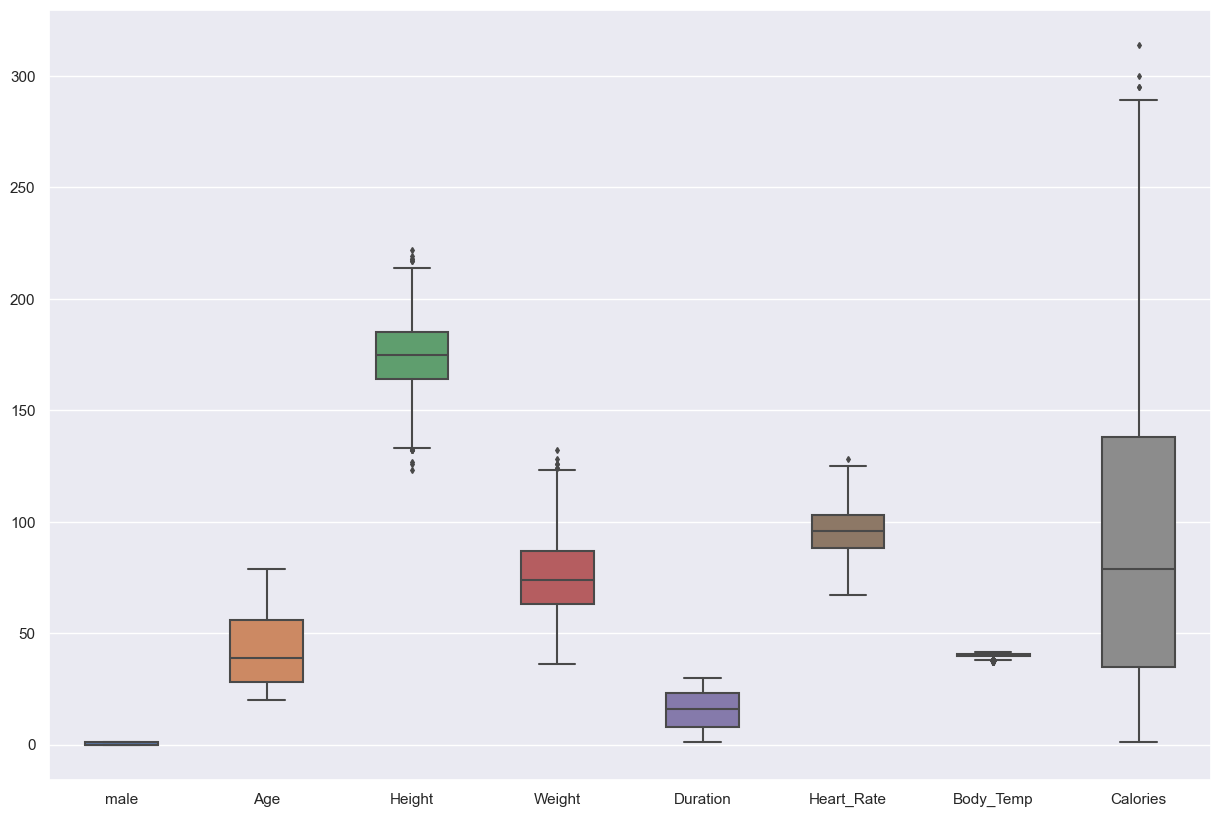

In [166]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

In [167]:
data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

**Separating features and Target**

In [168]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [169]:
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [170]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

**Splitting the data into training data and Test data**

In [171]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [172]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [173]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training**

**Evaluation**

**Prediction on Test Data**

In [174]:
#from sklearn import metrics

from sklearn.metrics import mean_absolute_error as mae
models = [XGBRegressor(),LinearRegression(),
          DecisionTreeRegressor(),RandomForestRegressor()]

def predict(models):
    
    model=models.fit(X_train,y_train)
    
    print('Score : {}'.format(model.score(X_train,y_train)*100))
    y_prediction=model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('Mean Absolute Error=',metrics.mean_absolute_error(y_test,y_prediction))
        
for i in range(4):  
    print(f'{models[i]} : ')
    predict(models[i])
    print('\n')
    

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Score : 99.95740793511015
Predictions are: [197.55533   71.09331  196.11734  ...  27.588661 107.2924    14.824119]
r2 score: 0.9987265304560019
Mean Absolute Error= 1.5230812824964524


LinearRegression() : 
Score : 96.75925554735781
Predictions are: [198.